Author: Carlos Roberto de Melo
    
Date: 09/04/2020
    
Obj: Create a mask

In [1]:
import autofit as af
import autolens as al
import autolens.plot as aplt
import scribbler
import numpy as np

data_folder = "/home/carlos/Documents/GitHub/Master-Degree/Autolens tests/autolens_workspace/Test_5/Simulation_Data/"

First, load the imaging dataset, so that the mask can be plotted over the strong lens image.

In [2]:
pixel_scales = 0.1

image = al.Array.from_fits(
    file_path=f"{data_folder}/arcs_simulation.fits", pixel_scales=pixel_scales,
)

noise = al.Array.from_fits(
    file_path=f"{data_folder}/noise_simulation.fits", pixel_scales=pixel_scales,
)

In [3]:
#Select and drawn the mask
scribbler = scribbler.Scribbler(image=image.in_2d/noise.in_2d)

In [4]:
mask = scribbler.show_mask()

In [5]:
mask = al.Mask.manual(mask=np.invert(mask), pixel_scales=pixel_scales)

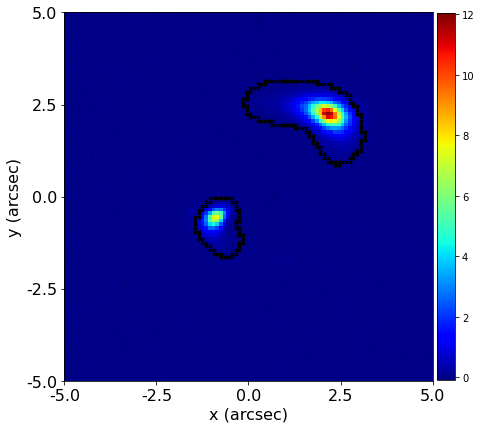

In [6]:
%matplotlib inline
aplt.Array(array=image, mask=mask)

In [7]:
#Save in fits file
mask.output_to_fits(file_path=f"{data_folder}/mask.fits", overwrite=True)

Now we load the mask and data to see how it works.

In [14]:
#Reading data
#Load data
imaging = al.Imaging.from_fits(
        image_path=f"{data_folder}/arcs_simulation.fits",
        noise_map_path=f"{data_folder}/noise_simulation.fits",
        psf_path=f"{data_folder}/psf_simulation.fits",
        pixel_scales=0.1,
    )


In [9]:
#Load mask

mask_custom = al.Mask.from_fits(
    file_path=f"{data_folder}/mask.fits", hdu=0, pixel_scales=pixel_scales,
)

masked_imaging = al.MaskedImaging(imaging=imaging, mask=mask_custom)

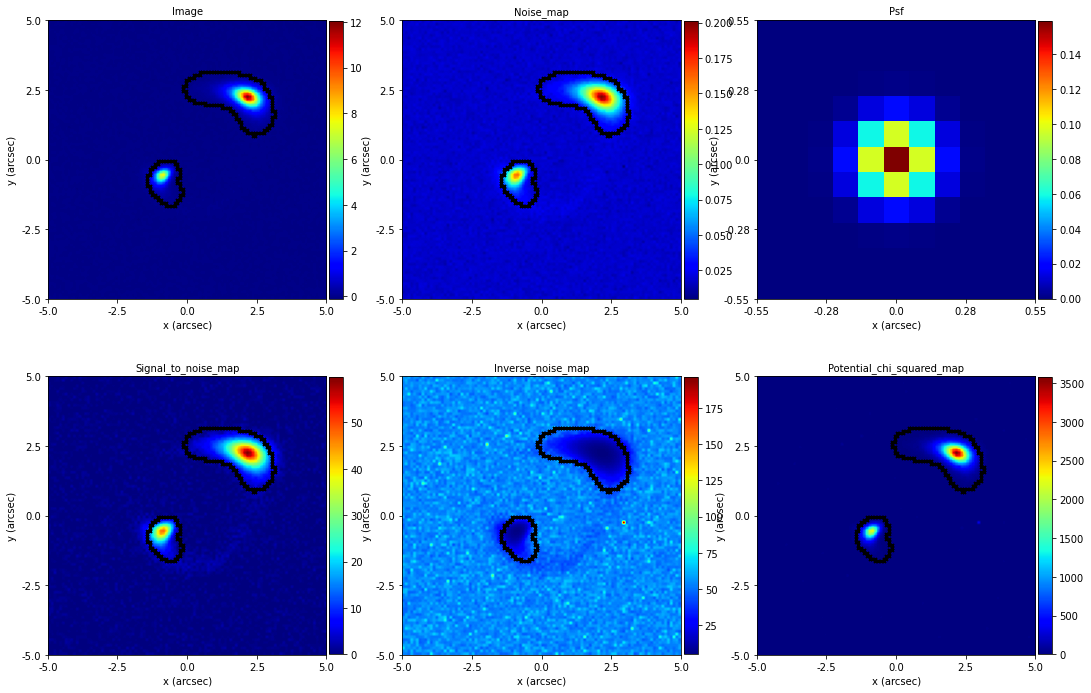

In [10]:
%matplotlib inline
#Plot

aplt.Imaging.subplot_imaging(
    imaging=imaging, mask=mask_custom, include=aplt.Include(border=False),
)

In [11]:
masked_imaging.grid.shape

(676, 2)

## Using a Threshold

In [3]:
from mpdaf.obj import Image
import numpy as np

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [4]:
img   = Image(data_folder+"arcs_simulation.fits")
noise = Image(data_folder+"noise_simulation.fits")

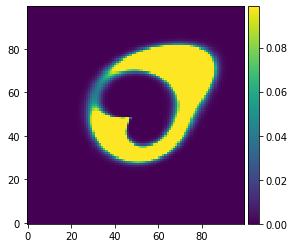

In [5]:
%matplotlib inline

sn_map = img/noise.data.data[0][0]
sn_map.plot(zscale=True, colorbar='v')

In [10]:
mask = (sn_map.data.data > 1)

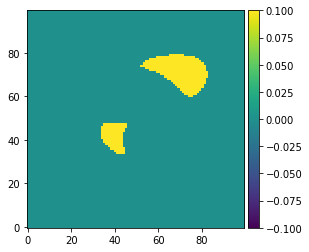

In [11]:
%matplotlib inline

new_mask = sn_map * mask
new_mask.plot(zscale=True, colorbar='v')

In [12]:
new_mask.data.data[np.where(new_mask.data.data != 0)] =  1.0

where_0 = np.where(new_mask.data.data == 0)
where_1 = np.where(new_mask.data.data == 1)

new_mask.data.data[where_0] = 1
new_mask.data.data[where_1] = 0



new_mask.write(data_folder+"new_mask.fits")

In [15]:
#Load mask

mask2 = al.Mask.from_fits(
    file_path=f"{data_folder}/new_mask.fits", hdu=1, pixel_scales=pixel_scales,
)

masked_imaging2 = al.MaskedImaging(imaging=imaging, mask=mask2)

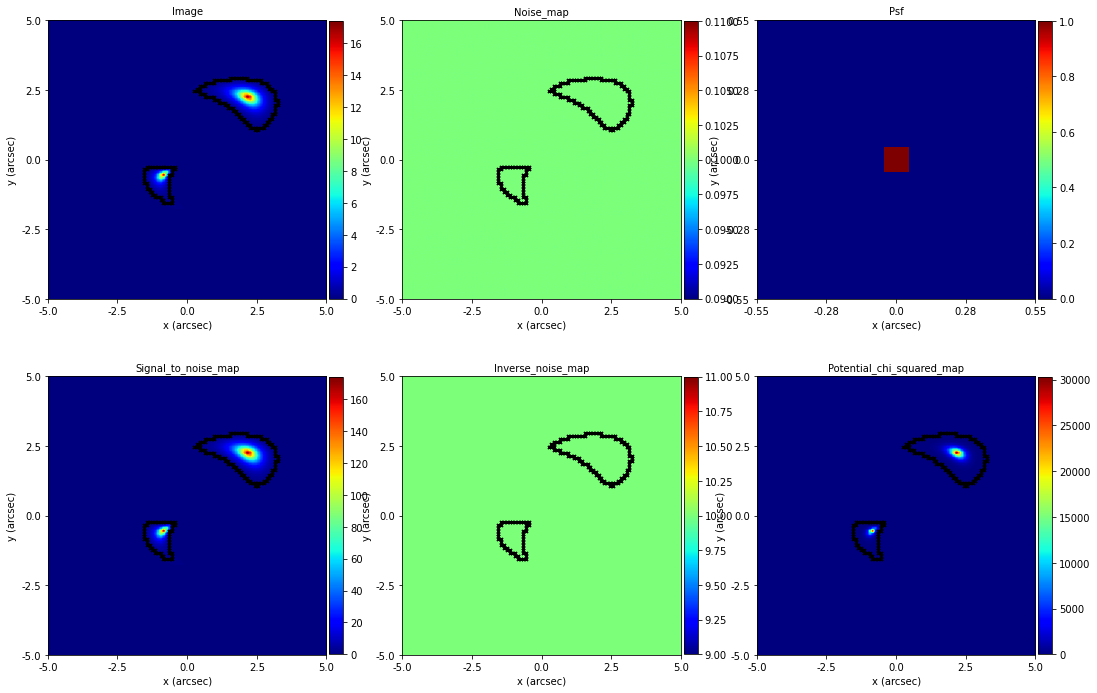

In [16]:
%matplotlib inline
#Plot

aplt.Imaging.subplot_imaging(
    imaging=imaging, mask=mask2, include=aplt.Include(border=False),
)

In [17]:
masked_imaging2.grid.shape

(476, 2)